In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importing the datasets

df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.shape

(400, 5)

In [5]:
X = df.iloc[:, [2,3]]
Y = df.iloc[:, 4]

In [6]:
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [7]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [9]:
#Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [10]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

**Applying Support Vector Machine**

In [11]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_Train, Y_Train)

# Predicting the test set results             
Y_Pred = classifier.predict(X_Test)

In [13]:
from sklearn import metrics
print('Accuracy Score: with linear kernel')                          

print(metrics.accuracy_score(Y_Test,Y_Pred)*100, '%')                 

Accuracy Score: with linear kernel
90.0 %


In [15]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')                  
classifier.fit(X_Train, Y_Train)

# Predicting the test set results
Y_Pred = classifier.predict(X_Test)                         

print('Accuracy Score: with default rbf kernel')
print(metrics.accuracy_score(Y_Test,Y_Pred)*100, '%')                                  

Accuracy Score: with default rbf kernel
93.0 %


In [ ]:
# Linear SVM is a parametric model, an RBF(radial basis function kernel) kernel SVM isn't, and the complexity of the latter grows with the size of the training set.

In [ ]:
# RBF has the advantages of K-NN and overcomes the space complexity problem as RBF Kernel Support Vector Machines just needs to store the support vectors during training and not the entire dataset.

In [18]:
from sklearn.svm import SVC
#classifier = SVC(kernel = 'rbf', gamma = 10,  random_state=0)  # 93% accuracy
classifier = SVC(kernel = 'rbf', gamma = 15, C=7,  random_state=0) 
classifier.fit(X_Train, Y_Train)

# Predicting the test set results

Y_Pred = classifier.predict(X_Test)

print('Accuracy Score On Test Data: with default rbf kernel')
print(metrics.accuracy_score(Y_Test,Y_Pred)*100, '%')

Accuracy Score On Test Data: with default rbf kernel
89.0 %


In [19]:
svc=SVC(kernel='poly', degree = 4)
svc.fit(X_Train,Y_Train)

y_pred=svc.predict(X_Test)
print('Accuracy Score:with poly kernel and degree ')
print(metrics.accuracy_score(Y_Test,Y_Pred)*100, '%')

Accuracy Score:with poly kernel and degree 
89.0 %


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


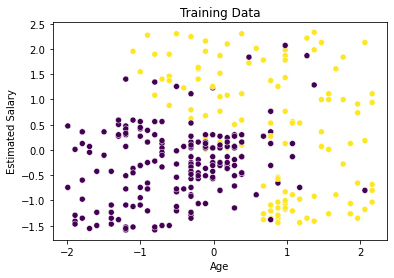

In [33]:
import matplotlib.pyplot as plt

sns.scatterplot(X_Train[:, 0], X_Train[:, 1],c=Y_Train)  
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Training Data')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


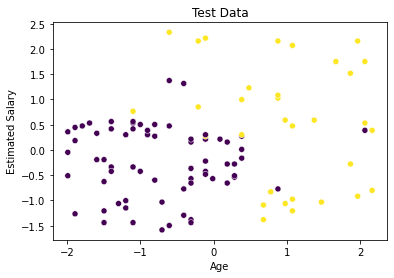

In [32]:
import matplotlib.pyplot as plt


sns.scatterplot(X_Test[:, 0], X_Test[:, 1],c=Y_Test, cmap = 'viridis')  
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Test Data')
plt.show()

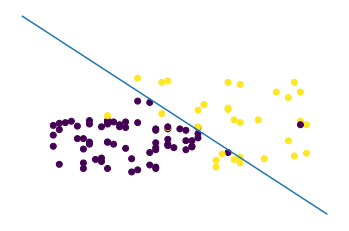

In [35]:
# Plot data points

plt.scatter(X_Test[:, 0], X_Test[:, 1],c=Y_Test)  
#plt.scatter(X_Train[:, 0], X_Train[:, 1],c=Y_Train) 

# Create the hyperplane
w = classifier.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (classifier.intercept_[0]) / w[1]  

# Plot the hyperplane
plt.plot(xx, yy)
plt.axis("off"), plt.show();
